<h5>In this project, we will be looking at housing data (you can consider it as large flats/apartments) and its relation with its value. We will explore the data, clean it if necessary and create a linear model to predict prices.  <br>
The book that is being followed is "Hands on machine learning with scikit learn and tensorflow 1".<br>

First, we will retrieve the data from a github repository and extract it into a folder

In [1]:
import os
import tarfile
import numpy as np
from six.moves import urllib
from IPython.display import HTML

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("../datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

<h5>Now, after getting our data, we will open the it using pandas as it is being stored in the format of a CSV.

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
df = load_housing_data()

<h5>Lets check what the data will look like and some more related information

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h5>The data contains about 20640 rows and 10 columns.

<h5>As you might notice, most of the fields are numerical except the ocean proximity. Lets find out how many categories are there and the total number for each

In [13]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<h5>Lets get some statistics regarding our numerical features

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h5>Lets visualize our data to get a little more information

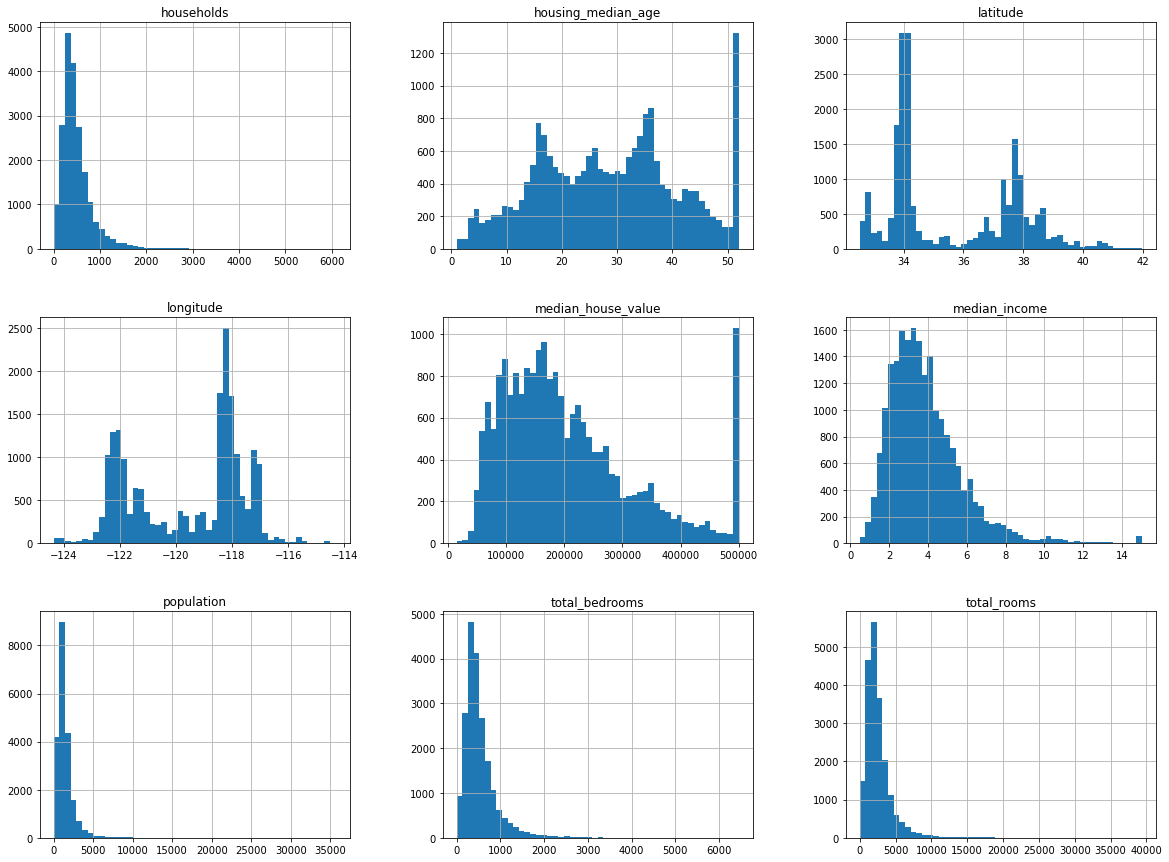

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=50, figsize=(20,15))
toggle_warning()

<h5>As you can see from the above statistical data and the plot for housing median age, 25% of people owning houses are aged below 18, 50% below 29 and 75% below 37 and the maximum age is 52. <br>

For median income, most households earn between 5 and 2 as seen in the figure and the data. The data for median income has been scaled and capped at 15 for higher median incomes, and at 0.5 for lower median incomes.<br>

You can easily see the general gist of the data distribution from the figures

<h5>The median_income feature holds a lot of significance so lets look at it closely. Lets cap our data to 5 and normalize it by dividing all values by 1.5

In [15]:
df["income_cat"] = np.ceil(df['median_income'] / 1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

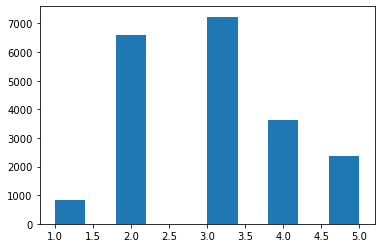

In [16]:
plt.hist(df["income_cat"])

<h5>As you can see, the data is skewed with median income being largely falling between 2 and 3. So, we have to make sure that our test data includes all types of median income values

<h5>Lets first split our data into training and testing so that the testing data will be completely random and we won't have any knowledge about it.

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

<h5>Now, lets change our data to have all types of median income values in our datasets

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

<h5>Lets make sure our training and testing data have all types of median income values

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

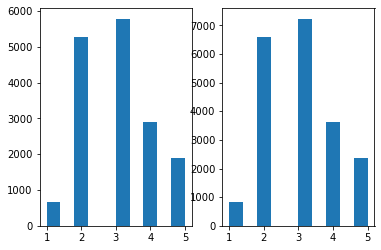

In [19]:
plt.subplot(1,2,1)
plt.hist(train_set["income_cat"])
plt.subplot(1,2,2)
plt.hist(df["income_cat"])

In [20]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<h5>Now, lets use our processed training data and visualize it

In [21]:
df_pre = train_set.copy()

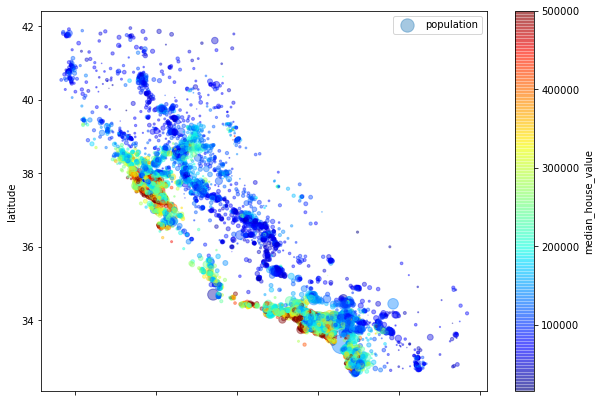

In [23]:
#lets plot our longitude and latitude to get a general geographical data
#The radius of each circle represents the district’s population (option s)
#the color represents the price (option c)

df_pre.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df_pre["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()

toggle_warning()

Map of California.<br>
<strong>As you can see, many properties that are along the shoreline have much greater value than those of inland. This might have an effect on our results.
<img src="California_map.jpg" style="width: 500px;"> 

<h5>Lets check the correlation between the medain house values and features and the general correlation

In [24]:
df_pre.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<h5>The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.<br> 
    
When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). <br>
    
Finally, coefficients close to zero mean that there is no linear correlation

<AxesSubplot:>

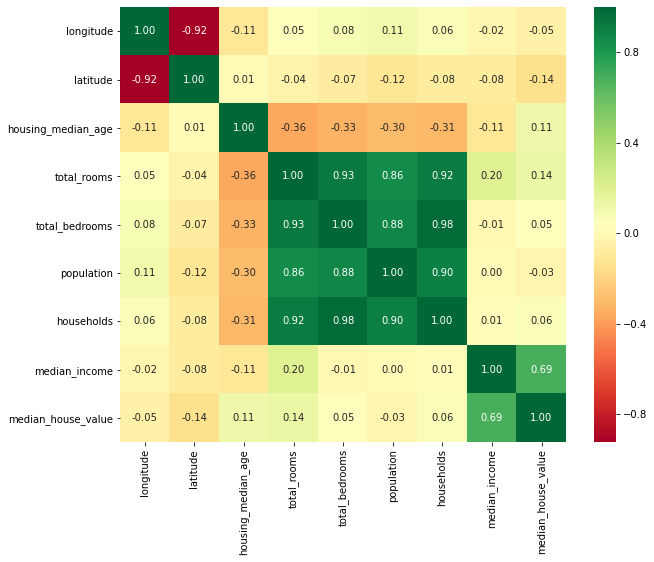

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df_pre.corr(),annot=True, fmt='.2f', cmap='RdYlGn',)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

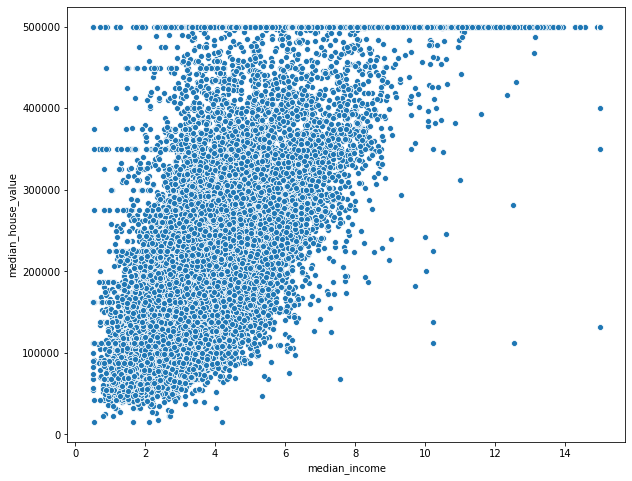

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_pre['median_income'],df_pre['median_house_value'])

<h5>As you can see in the plot above, there is some sort of linear relationship between median income and house value. 
<br><br>
The price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that.

<AxesSubplot:xlabel='total_rooms', ylabel='households'>

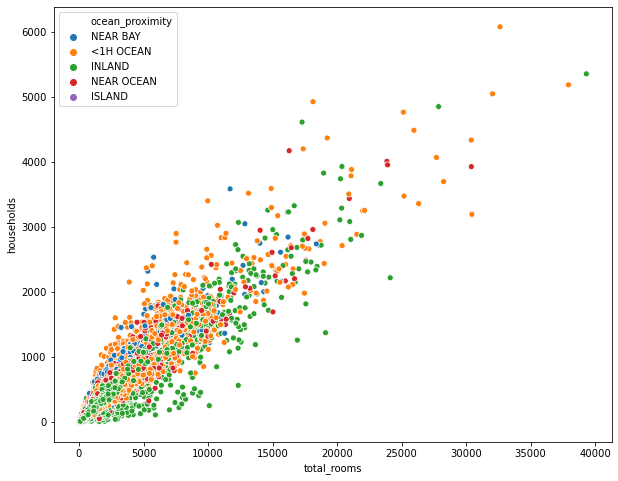

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['total_rooms'],df['households'],hue=df['ocean_proximity'])

<h5>As you can see, there is a linear relation between the number of households and total rooms with most households lying with below 12000 rooms.

<h5> Lets play with feature combinations as they might be more useful than the original features. Such as the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household.

In [26]:
df_pre["rooms_per_household"] = df_pre["total_rooms"]/df_pre["households"]

df_pre["bedrooms_per_room"] = df_pre["total_bedrooms"]/df_pre["total_rooms"]

df_pre["population_per_household"]=df_pre["population"]/df_pre["households"]

<h5>Now lets check the correlation again to see the effect of the new variables on median income

In [27]:
df_pre.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

<h5>The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.
    
   <br><br>
   The rooms per household also shows an effect on the median household value. As the number of rooms per household increase, the house value also increases

<h5>Lets use our original training data and clean it to use it for our algorithm.

In [29]:
#the only missing values were in the total bedrooms column. Lets replace all Nan values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [44]:
df_clean = train_set.drop("median_house_value", axis=1)
df_clean_labels = train_set["median_house_value"].copy()

In [45]:
df_numerical = df_clean.drop("ocean_proximity", axis=1)

In [46]:
imputer.fit(df_numerical)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [47]:
X = imputer.transform(df_numerical)

In [48]:
df_cleaned = pd.DataFrame(X, columns=df_numerical.columns)

<h5>Now lets change our ocean proximity column to numerical by using one hot encoding.

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat = df_clean["ocean_proximity"]
df_cat_encoded = encoder.fit_transform(df_cat)

In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_cat_1hot = encoder.fit_transform(df_cat_encoded.reshape(-1,1))

In [52]:
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
df_cat_1hot = encoder.fit_transform(df_cat)

<h5>Lets add all these classes to our dataset

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

#these are the attributes added: rooms_per_household, population_per_household,bedrooms_per_room
#and a column for each category of oceam proximity column
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [57]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df_clean.values)

<h5>As you can see, there are many steps to follow in an accurate order. It is better to automate it using pipelines.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
df_num_tr_pipe = num_pipeline.fit_transform(df_numerical)

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None,):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

<h5>As we have a categorical attribute, we create two pipelines, one to deal with numerical values and one for categorical

In [93]:
num_attribs = list(df_numerical)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ])

<h5>Here we combine both pipelines to get a single returned data

In [94]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

<h5>Now lets get our fully prepared dataset

In [95]:
df_prepared = full_pipeline.fit_transform(df_clean)

In [96]:
df_prepared.shape

(16512, 16)

<h5>Now we develop our models as our training data has been processed.<br> First, we initialize a linear regression model and fit it with the prepared data and the labels.

In [97]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_clean_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h5>After fitting the model with our prepared data, we get five rows from our cleaned dataset and their labels and pass the data through the pipeline. Then, using our model's predict function, predict the median house value for the 5 rows and print the predicted and true values

In [99]:
lin_reg_rand_data = df_clean.iloc[:5]
lin_reg_rand__labels = df_clean_labels.iloc[:5]
lin_reg_rand_data_prepared = full_pipeline.transform(lin_reg_rand_data)

print("Predictions:", lin_reg.predict(lin_reg_rand_data_prepared))

print("Labels:", list(lin_reg_rand__labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


<h5>It works, although the predictions are not exactly accurate. Lets find RMSE.

In [100]:
from sklearn.metrics import mean_squared_error
linear_reg_predicts = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_clean_labels, linear_reg_predicts)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

<h5>This is not a great score: most districts’ median_housing_values range between 120,000 and 265,000, so a typical prediction error of 68,628 is not very satisfying. This is a case of underfitting as the predictions being done are on training data
<br><br>
Lets train a decision tree regressor and find the RMSE.

In [101]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_clean_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [103]:
tree_reg_predicts = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_clean_labels, tree_reg_predicts)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<h5> How is a zero RMSE possible?! This could be a scenario of the model being badly overfitted. Lets use a validation dataset from our training data to check its metrics or cross validation.<br><br>
The following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and
training on the other 9 folds.

In [109]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, df_prepared, df_clean_labels,
    scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

<h5>Lets create a function that displays the scores for each validation loop and the mean and standard deviation

In [105]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [110]:
display_scores(tree_rmse_scores)

Scores: [69244.61630919 67462.2439885  70216.55542074 69552.81601797
 69903.86843349 74391.23179314 70653.56837131 70565.6058368
 76666.65768066 69878.53483071]
Mean: 70853.56986825066
Standard deviation: 2539.0975285446348


<h5>It seems to perform worse than the Linear Regression model! The Decision Tree has a score of approximately 70,853, with a standard deviation(error range) of ± 2,539.
<br><br>
Lets check the score for the linear regression model as well

In [113]:
scores_lin_reg = cross_val_score(lin_reg, df_prepared, df_clean_labels,
    scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores_lin_reg)

In [114]:
display_scores(lin_reg_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


<h5>It seems to perform better than the Decision Tree model! The Decision Tree is overfitting badly. The Linear Regression model has a score of approximately 69,052, with a standard deviation(error range) of ± 2,731.
<br><br>
Lets create a Random Forest Regressor and find the scores.

In [115]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_clean_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<h5>Lets find the RMSE and the cross validation scores.

In [116]:
forest_reg_predicts = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_clean_labels, forest_reg_predicts)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18659.100636540217

In [117]:
#this will take more time than the previous models
scores_forest_reg = cross_val_score(forest_reg, df_prepared, df_clean_labels,
    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest_reg)

In [118]:
display_scores(forest_rmse_scores)

Scores: [49943.32065894 47329.32453833 49824.78565849 52249.35428736
 49878.34544743 53253.72016583 48918.62899902 48387.46545134
 52557.58354219 49925.66099778]
Mean: 50226.81897466916
Standard deviation: 1806.361862824426


<h5>Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set.
<br><br>
Lets try more models then we will select the best one for our testing data

# Note!

#If you want to save your model, use the below code and change the name of my model and to load it use the last line so that 
#you don't need to train each model more than once
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

<h5>Lets fine tune models with different values of attributes and find the best combination. You can do this manually using a loop or use GridSearchCV where you can identify the values of attributes you want to check.
<br><br>
Below is the fine tuning of a forest regressor with the variables as shown.

In [122]:
#When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a
#smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30, 50, 90], 'max_features': [2, 4, 6, 8, 16]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(df_prepared, df_clean_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [123]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 90}

<h5>This shows that for a forest regressor, the best parmeters are as such. You can play with the variabls as well. Lets find the mean score for all the models with different parameters

In [124]:
cvres_forest = grid_search.cv_results_
for mean_score, params in zip(cvres_forest["mean_test_score"], cvres_forest["params"]):
    print(np.sqrt(-mean_score), params)

63766.59820929721 {'max_features': 2, 'n_estimators': 3}
55733.41621378693 {'max_features': 2, 'n_estimators': 10}
52959.27097457962 {'max_features': 2, 'n_estimators': 30}
52685.578070965224 {'max_features': 2, 'n_estimators': 50}
52175.20772339127 {'max_features': 2, 'n_estimators': 90}
61180.87099361253 {'max_features': 4, 'n_estimators': 3}
53370.94430031327 {'max_features': 4, 'n_estimators': 10}
50379.97472936844 {'max_features': 4, 'n_estimators': 30}
50020.518747585265 {'max_features': 4, 'n_estimators': 50}
49883.96311114053 {'max_features': 4, 'n_estimators': 90}
59365.535055696746 {'max_features': 6, 'n_estimators': 3}
52350.43363754234 {'max_features': 6, 'n_estimators': 10}
49917.49057940229 {'max_features': 6, 'n_estimators': 30}
49718.21540870237 {'max_features': 6, 'n_estimators': 50}
49269.05565007442 {'max_features': 6, 'n_estimators': 90}
58690.30045110099 {'max_features': 8, 'n_estimators': 3}
52163.58590196397 {'max_features': 8, 'n_estimators': 10}
49986.142444201

<h5>The lowest RMSE we obtained from this fine tuning is  49,269 which was calculated with the parameters being {'max_features': 6, 'n_estimators': 90}, which is slightly better than the score you got earlier using the default hyperparameter values(RMSE : 50,226) <br><br>

(Lets also use RandomizedSearchCV for the forest regressor. This basically requires the number of iterations you want it to go through and it will select the parameters itself.)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
forest_reg = RandomForestRegressor()

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf_random = RandomizedSearchCV(estimator = forest_reg,
                               n_iter = 1000, cv = 3, param_distributions = random_grid, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(df_prepared, df_clean_labels)

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)
print(rf_random.best_estimator_)

<h5> Lets check the importance of features for the forest regressor model to find insights

In [128]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [132]:
sorted(zip(grid_search.best_estimator_.feature_importances_, attributes), reverse=True)

[(0.33039943465923766, 'median_income'),
 (0.14492844049882503, 'INLAND'),
 (0.10829115794381718, 'pop_per_hhold'),
 (0.08129745138592531, 'bedrooms_per_room'),
 (0.07504354337150573, 'longitude'),
 (0.06993845757704426, 'latitude'),
 (0.05731219741659246, 'rooms_per_hhold'),
 (0.0422238684706631, 'housing_median_age'),
 (0.018561497998991528, 'population'),
 (0.01758819076635351, 'total_rooms'),
 (0.017235499125266337, 'total_bedrooms'),
 (0.016178633505207166, 'households'),
 (0.009666772273414104, '<1H OCEAN'),
 (0.005718727634180999, 'NEAR BAY'),
 (0.005532939184250702, 'NEAR OCEAN'),
 (8.318818872496678e-05, 'ISLAND')]

<h5>With this information, you may want to try dropping some of the less useful features (e.g., apparently only
one ocean_proximity category is really useful, so you could try dropping the others).<br><br>
Now lets evaluate our model using test data. The scores will be slightly worse than the training data.

In [133]:
final_model = grid_search.best_estimator_

In [136]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

In [137]:
X_test_prepared = full_pipeline.transform(X_test)

In [138]:
final_predictions = final_model.predict(X_test_prepared)

In [139]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [140]:
final_rmse

47151.9183133156

<h5>Lets create a full pipeline which transforms the data as well as fits a model for predictions

In [155]:
pipeline_with_fit_predict = Pipeline([
        ("preparation", full_pipeline), #this is the pipeline we created previously
        ("forest",RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False))  
    #this is the model that we will use. You can change it to your liking, 
    #over here we are using the forest model with the best parameters
    ])

In [152]:
#lets create a function to output the RMSE score
def rmse_score(predict_values,true_values):
    temp_mse = mean_squared_error(true_values, predict_values)
    temp_rmse = np.sqrt(temp_mse)
    return temp_rmse

In [156]:
pipeline_with_fit_predict.fit(df_clean, df_clean_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('num_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['longitude',
                                                                                                     'latitude',
                                                                                                     'housing_median_age',
                                                                                                     'total_rooms',
                                                                                                     'total_bedrooms',
                                                                                                     'po

In [159]:
rmse_score(pipeline_with_fit_predict.predict(test_set),y_test)

47238.67005362797

<h5>Lets use an SVM with hyperparameters using gridsearchCV as well to compare the scores

In [161]:
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [5., 15., 45., 135., 500., 1500., 4500., 13500.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(df_prepared, df_clean_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 14.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 24.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [5.0, 15.0, 45.0, 135.0, 500.0, 1500.0, 4500.0,
                                13500.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [162]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70371.13700683118

In [163]:
grid_search.best_params_

{'C': 13500.0, 'kernel': 'linear'}

The linear kernel is doing a better job but as you see that the best C parameter value is the greatest. You might want to change it by starting the C values by the current greatest value.

That will be all

In [11]:
def toggle_warning():
    HTML('''<script>
    code_show_err=false; 
    function code_toggle_err() {
     if (code_show_err){
     $('div.output_stderr').hide();
     } else {
     $('div.output_stderr').show();
     }
     code_show_err = !code_show_err
    } 
    $( document ).ready(code_toggle_err);
    </script>
    To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')